# Análise de Dados (EDA)
Neste notebook, vamos nos aprofundar na análise e visualização dos dados, buscando extrair insights valiosos que nos ajudem a entender melhor os padrões socioeconômicos e demográficos presentes. Cada visualização será uma peça fundamental para revelar tendências e correlações significativas. Nosso objetivo é transformar dados brutos em informações compreensíveis e úteis.
Vamos explorar questões cruciais que podem nos fornecer uma visão mais clara sobre o desempenho dos alunos e os fatores que influenciam suas notas. Algumas das perguntas que guiaremos em nossa análise são:

- **Como as notas dos alunos estão correlacionadas entre si?** Queremos entender se existe uma relação consistente entre diferentes áreas de conhecimento e como essas relações podem influenciar o desempenho geral.

- **Qual é o impacto da educação familiar nas notas dos alunos?** Investigaremos se o nível de escolaridade dos pais tem um efeito significativo nas notas dos alunos e como isso se reflete nos resultados obtidos.

- **Qual faixa etária tende a obter as melhores notas?** Analisaremos as notas de acordo com a idade dos alunos para identificar se há um padrão de desempenho associado a diferentes grupos etários.

- **Qual é a diferença nas notas entre alunos de escolas particulares e públicas?** Avaliaremos a escala de variação nas notas entre esses dois tipos de instituições de ensino para entender melhor como o tipo de escola pode influenciar o desempenho acadêmico.

- **Como o estado civil dos alunos afeta suas notas?** Examinaremos se existem diferenças significativas nas notas baseadas no estado civil dos alunos e como isso pode refletir em seus resultados.

- **Quais são as notas dos alunos que não têm acesso à internet?** Verificaremos o impacto da falta de acesso à internet nas notas dos alunos e se essa limitação afeta negativamente seu desempenho acadêmico.

- **Como a renda familiar influencia as notas dos alunos?** Investigaremos a relação entre a faixa de renda da família e o desempenho dos alunos para identificar possíveis padrões e discrepâncias.

Cada uma dessas questões será abordada com a ajuda de visualizações que facilitarão a compreensão dos dados e permitirão uma análise mais aprofundada. Estamos ansiosos para revelar os insights e descobrir como diferentes fatores interagem para influenciar os resultados acadêmicos.



### Importando e Lendo bibliotecas

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import geopandas as gpd
import matplotlib as mpl
import libpysal as ps
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
enem_df = pd.read_parquet("C:\\Users\\Lucas\\Data Science P1\\Data Science//EnemProject.parquet")


In [5]:
pth = ps.examples.get_path("C:\\Users\\Lucas\\Data Science P1\\Data Science//EnemProject.parquet")


C:\Users\Lucas\Data Science P1\Data Science//EnemProject.parquet is not a file in any installed dataset.


In [6]:
enem_df.head(3)

,Faixa_etaria,Sexo,Estado_civil,Cor_raca,Escola,Treineiro,Uf_esc,Nota_cn,Nota_ch,Nota_lc,Nota_mt,Nota_redacao,Escolaridade_pai,Escolaridade_mae,Renda_familiar,Celular,Computador,Internet,Nota_geral
0,"26 - 44, Adulto",M,Casado(a),Preta,Não Respondeu,Não,NaN,NaN,NaN,NaN,NaN,NaN,Nunca Estudou,Nunca Estudou,"Ate 1.212,00",Não,Não,Não,NaN
1,"26 - 44, Adulto",M,Casado(a),Branca,Não Respondeu,Não,NaN,NaN,NaN,NaN,NaN,NaN,Fundamental 2,Fundamental 2,"Acima de 24.240,00","Sim, quatro ou mais","Sim, quatro ou mais",Sim,NaN
2,"20 - 25 , Jovens Adultos",F,Solteiro(a),Preta,Não Respondeu,Não,NaN,421.100006,546.0,498.799988,565.299988,760.0,Ensino Médio,Graduação Universitária,"Ate 1.212,00","Sim, dois",Não,Sim,558.23999


In [7]:
total = enem_df["Cor_raca"].count()
## Não importa qual total escolheremos, pois todos os totais usados para porcentagem tem o mesmo número de linhas.

In [8]:
dicfxslr = {"Nota":np.array([446,498,576,604,664,736]),
        "Faixa Salarial":np.array(["Nenhuma Renda","Nenhuma Renda","Nenhuma Renda","Acima de 24.240,00","Acima de 24.240,00","Acima de 24.240,00"]),
        "Percentis":np.array(["30%","60%","90%","30%","60%","90%"])}
fxslrprcnt = pd.DataFrame(dicfxslr)
## Colocar isso em outra parte no github
dicesclrd = {"Escolaridade":np.array(["Ensino Médio","Ensino Médio","Ensino Médio","Pós Graduação","Pós Graduação","Pós Graduação"]),
           "Percentis":np.array(["30%","60%","90%","30%","60%","90%"]),
            "Nota":np.array([500,561,648,549,618,704]) }
esclrdprcnt = pd.DataFrame(dicesclrd)
##
dicfxet= {"Nota":np.array([500,544,657,494,539,680,481,521,643]),
          "Faixa_Etária":np.array(["Adolescente","Adolescente","Adolescente","Jovens Adultos","Jovens Adultos","Jovens Adultos","Adulto","Adulto","Adulto"]),
           "Percentis":np.array(["30%","60%","90%","30%","60%","90%","30%","60%","90%"])}
fxetprcnt = pd.DataFrame(dicfxet)
##
dicprcnt= {"Nota":np.array([489,549,627,482,544,610,464,567,699,450,506,596]), "Matéria":np.array(["Ciências Humanas","Ciências Humanas","Ciências Humanas","Linguagem","Linguagem","Linguagem","Matemática","Matemática","Matemática","Ciências Natureza","Ciências Natureza","Ciências Natureza"]),"Percentis":np.array(["30%","60%","90%","30%","60%","90%","30%","60%","90%","30%","60%","90%"])}
matriaprcnt = pd.DataFrame(dicprcnt)
##
dicrc = {"Raça":np.array(["Branca","Branca","Branca","Preta","Preta","Preta","Parda","Parda","Parda"]),
         "Nota":np.array([523,591,682,479,535,618,480,541,633]),
         "Percentis":np.array(["30%","60%","90%","30%","60%","90%","30%","60%","90%"])}
rcprcnt = pd.DataFrame(dicrc)


## Avaliação geral das notas

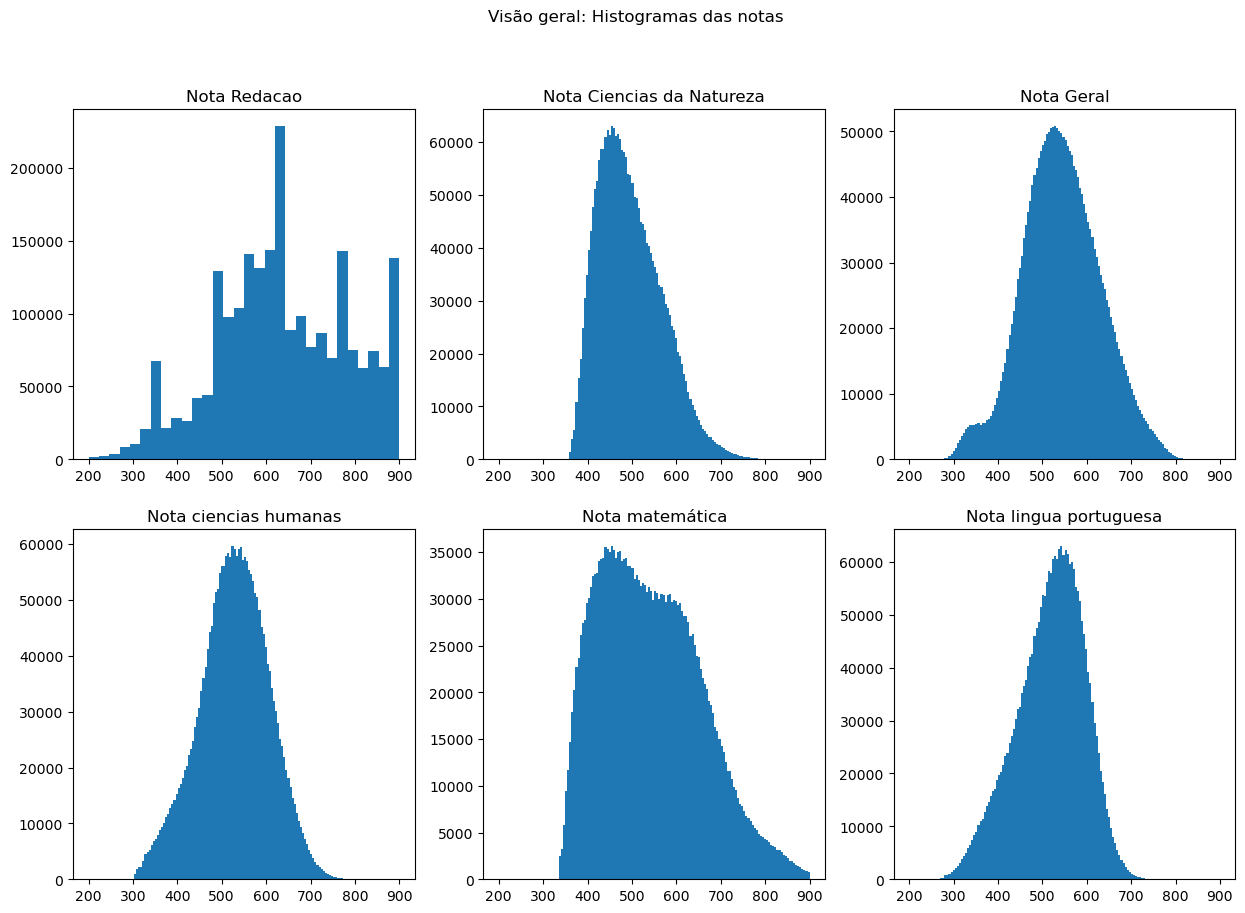

In [10]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3);
fig.suptitle("Visão geral: Histogramas das notas")   
ax0.hist(x = enem_df['Nota_redacao'],bins = 30,range=(200,900));
ax0.set_title("Nota Redacao")
ax1.hist(x = enem_df['Nota_cn'],bins = 150,range=(200,900));
ax1.set_title("Nota Ciencias da Natureza")
ax2.hist(x = enem_df["Nota_geral"],bins=150,range=(200,900));
ax2.set_title("Nota Geral")
ax3.hist(x = enem_df['Nota_ch'],bins = 150,range=(200,900));
ax3.set_title("Nota ciencias humanas")
ax4.hist(x = enem_df['Nota_mt'],bins = 150,range=(200,900));
ax4.set_title("Nota matemática")
ax5.hist(x = enem_df["Nota_lc"],bins=150,range=(200,900));
ax5.set_title("Nota lingua portuguesa");
fig.set_figwidth(15)
fig.set_figheight(10)
    


**Visão Geral do Gráfico** 
- Eixo X: Nós temos a distribuição dos valores de notas obtidos
- Eixo Y: Nós temos a frequência com qual a nota aparece
- Notas 0: A densidade de nota 0 não foi mostrada, pois representa os alunos que não compareceram à prova.

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
**Analise do Gráfico**

Como nós podemos ver, varios dos nossos histogramas possuem uma distribuição normal, exceto o da redação. Vale destacar alguns pontos de alguns histogramas:
 - **Ciencias da Natureza**: Observa-se que a cauda esquerda deste gráfico tem uma subida muito rápida, indicando uma inclinação acentuada. Isso significa que, diferentemente dos outros gráficos que apresentam um crescimento gradual nas notas, há um grande aumento logo no início, com notas inferiores a 400, indicando que a média dos alunos nesta área foi a pior. Esta estatística reforça um fato já conhecido: o Brasil é um dos piores países em Ciência. Clique [aqui](https://www.metropoles.com/brasil/brasil-esta-entre-os-20-piores-paises-em-matematica-e-ciencias-no-pisa) para saber mais
 - **Redação** - A redação no ENEM é uma das maneiras mais fáceis de melhorar a nota, pois raramente um aluno consegue superar 800 pontos em outras matérias, como Matemática. No entanto, na redação, não é incomum que um aluno atinja essa pontuação. Por isso, as notas de redação são menos previsíveis e provavelmente irão aumentar a média geral dos alunos, pois é muito mais difícil tirar notas altas nas outras áreas.
 - **Ciencias Humanas e Lingua Portuguêsa** - As distribuições dessas duas áreas são semelhantes, mas nota-se que a cauda esquerda inicial em Ciências Humanas é mais espessa do que em Língua Portuguesa, indicando uma maior densidade de alunos na faixa de 300 a 400 pontos. Além disso, a cauda esquerda de Língua Portuguesa começa um pouco mais à esquerda, mostrando que as notas mínimas são menores em Língua Portuguesa do que em Ciências Humanas. Esta análise é corroborada pelo gráfico abaixo. Também é notável que os dados de Ciências Humanas apresentam uma área maior, sendo mais dispersos. Por exemplo, no intervalo de 400 a 450, há menos alunos em Ciências Humanas do que em Língua Portuguesa, indicando uma maior disparidade de conhecimento na área de Ciências Humanas, então provavelmente os percentis de Ciências Humanas vão ter dados maiores que o de Língua Portuguesa. Esta observação pode ser confirmada pelo desvio padrão médio.
 - **Matemática** - Este é um dos gráficos mais bem distribuídos. O primeiro insight pode ser obtido observando o eixo Y, que não atinge 60.000 como nos outros gráficos, indicando uma menor densidade de notas. Também é perceptível que, após o percentil de 75%, há uma diferença significativa nas notas em comparação com as outras matérias, sendo aproximadamente 15% superior a Ciências da Natureza, por exemplo. Embora seja difícil comparar as caudas deste histograma com as dos outros apenas pelo método observacional, devido às diferentes escalas dos gráficos, é notável que, a partir da densidade de 5.000 pontos em Matemática, as notas variam entre 750 e 800, o que é diferente dos outros histogramas.


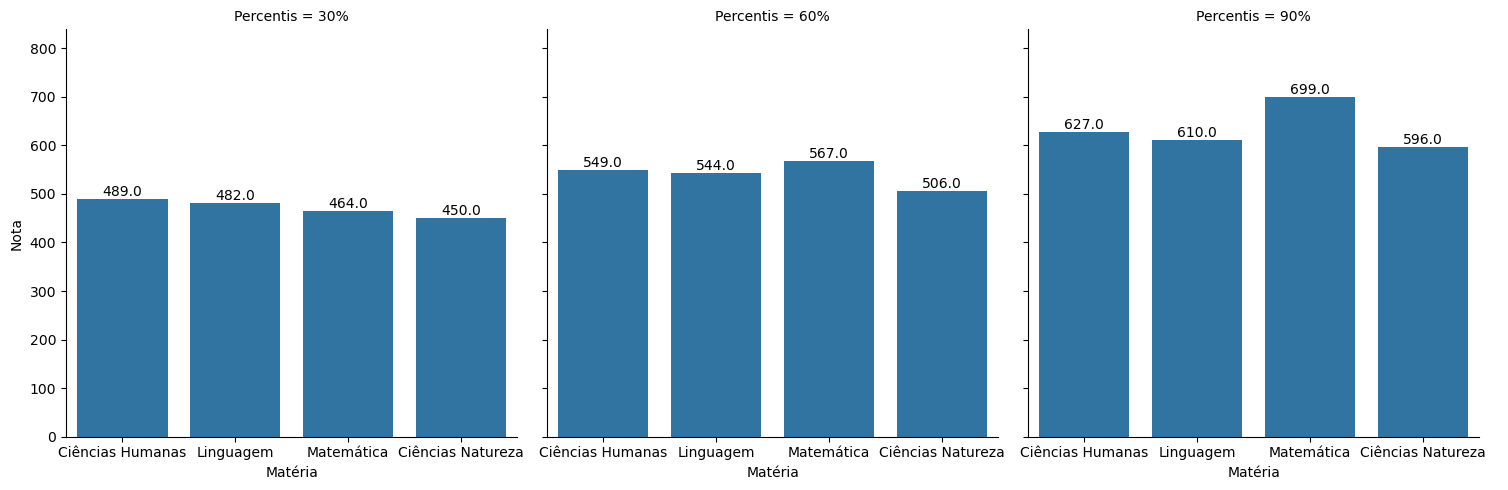

In [12]:

g = sns.catplot(matriaprcnt,x="Matéria",y="Nota",col="Percentis",kind="bar")
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5504\1423221045.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=(["Ciências da Natureza","Matemática","Ciencias Humanas","Linguas"]));


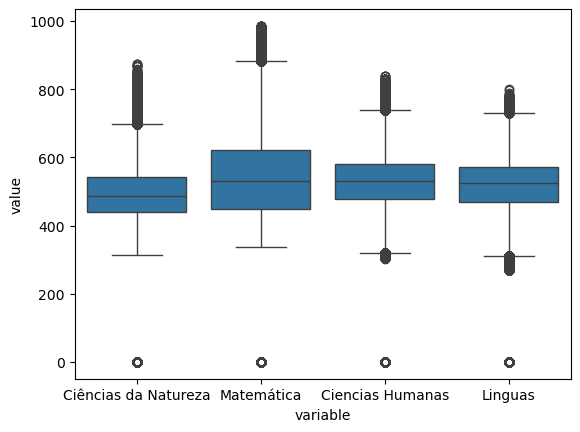

In [13]:
fig, ax = plt.subplots()
sns.boxplot(x='variable',y="value",data=pd.melt(enem_df[["Nota_cn","Nota_mt","Nota_ch","Nota_lc"]]))
ax.set(xticklabels=(["Ciências da Natureza","Matemática","Ciencias Humanas","Linguas"]));

**Visão geral do gráfico:**
- Eixo X: Máterias
- Eixo Y: Valor médio das notas

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
**Analise do Gráfico**

Ao observar o gráfico, percebemos que a maior média geral foi em Matemática, enquanto a pior, como esperado, foi em Ciências da Natureza. Como discutido anteriormente, em Matemática havia uma probabilidade maior de os alunos obterem notas mais altas, enquanto nas outras matérias essa probabilidade era reduzida. Isso é observável pela incerteza: ao olhar para as linhas que representam a incerteza "inferior" em Matemática, vemos que ela é uma das menores. Ou seja, os alunos tendem a manter suas notas próximas à média, sem uma queda tão frequente para notas inferiores, como ocorre nas outras matérias. Por outro lado, a linha superior, que indica a incerteza "superior", é maior, o que sugere uma maior chance de os alunos tirarem notas mais altas. Isso também é refletido pelo desvio padrão (standard deviation).

Ao analisar o desvio padrão das outras matérias, notamos que eles não variam muito entre si. Em algumas, a média tende a se desviar mais para cima, em outras para baixo, mas, no geral, os desvios padrões são bastante equiparados.

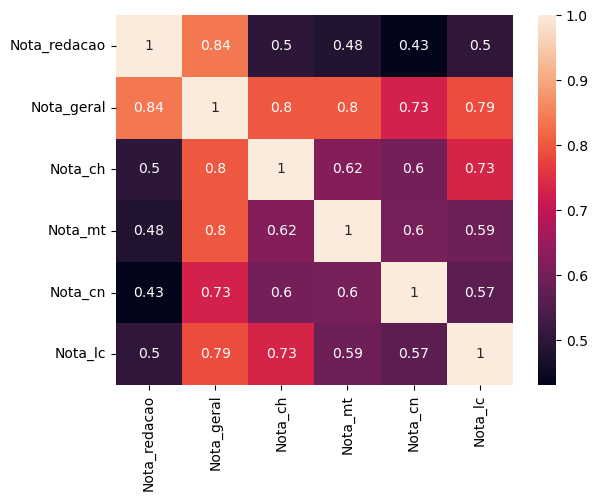

In [15]:
sns.heatmap(enem_df[['Nota_redacao', 'Nota_geral', 'Nota_ch', 'Nota_mt', 'Nota_cn','Nota_lc']].corr(), annot=True);


**Analise do Gráfico**

Como esperado, a nota que mais impacta a média geral é a nota de redação, e uma das correlações mais fortes entre duas matérias é entre Língua Portuguesa e Ciências Humanas. Eu havia formulado duas hipóteses para esses casos, mas, ao observar o panorama geral, foi possível notar que todas as notas (exceto a nota geral) têm a maior correlação com Ciências Humanas. Ou seja, entre os alunos que obtiveram as maiores notas nas diferentes matérias, eles também tendiam a se sair melhor em Ciências Humanas.


## Escolaridade pais

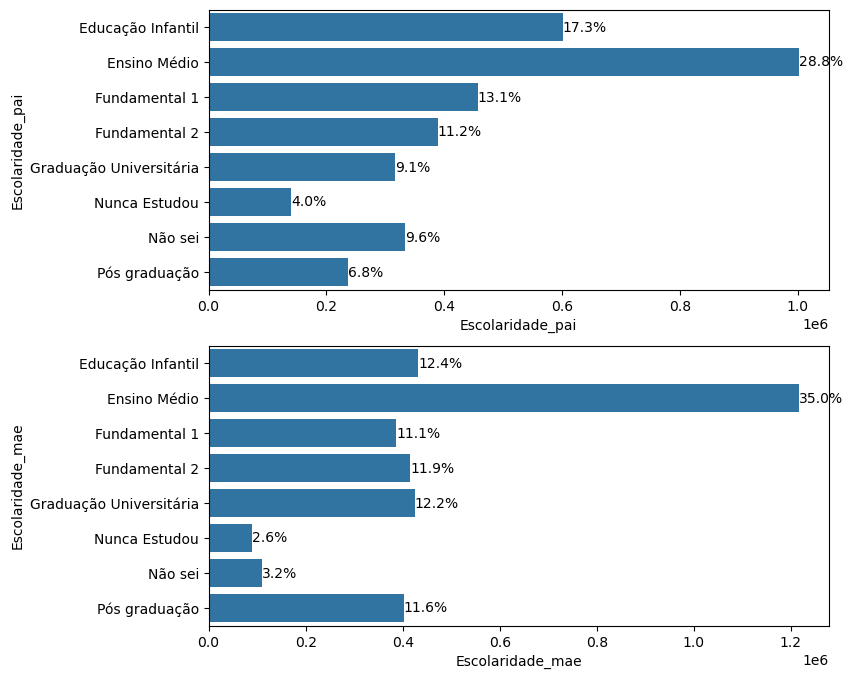

In [18]:
total = enem_df["Escolaridade_pai"].count()
f, ax = plt.subplots(2,1,figsize=(8,8),sharey=True)
sns.barplot(ax = ax[0],y=enem_df['Escolaridade_pai'].value_counts(normalize=True).index,x=enem_df.groupby("Escolaridade_pai")['Escolaridade_pai'].count().sort_values(ascending=False))
sns.barplot(ax = ax[1],y=enem_df['Escolaridade_mae'].value_counts(normalize=True).index,x=enem_df.groupby("Escolaridade_mae")['Escolaridade_mae'].count().sort_values(ascending=False))
ax[0].bar_label(ax[0].containers[0],fmt = lambda x: f'{(x/total)*100:0.1f}%');
ax[1].bar_label(ax[1].containers[0],fmt = lambda x: f'{(x/total)*100:0.1f}%');

**Visão Geral do Gráfico**
- Eixo X:Contagem
- Eixo Y: Escolaridade Pai/Mãe
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

**Analise do Gráfico**

Antes de fazermos nossa análise, é importante enfatizar que os dados referem-se à escolaridade dos pais e mães dos alunos que fizeram o ENEM, ou seja, não se trata de um censo geral sobre todos os adultos do país. Pode haver diferenças na escolaridade nos censos mais recentes, pois, com o passar dos anos, é mais provável que a população mais jovem tenha concluído o ensino médio, ensino superior, etc.

Observamos que 9,6% dos alunos não sabem o nível de escolaridade do pai. Uma possível justificativa para esses dados é o alto índice de abandono paterno no Brasil; clique [aqui](https://www.metropoles.com/brasil/brasil-esta-entre-os-20-piores-paises-em-matematica-e-ciencias-no-pisa) para saber mais. A escolaridade dos pais, diferentemente das mães, também tende a ser mais baixa, com uma maior proporção de homens permanecendo em níveis mais baixos de educação em comparação às mulheres.

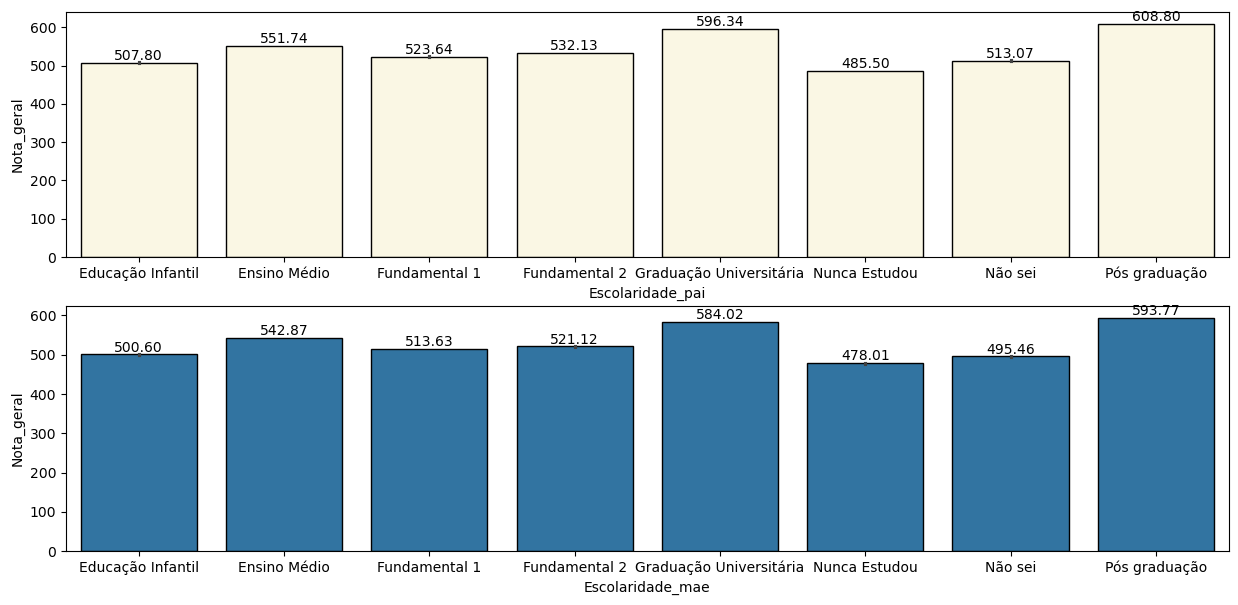

In [20]:
f,ax = plt.subplots(2,1,figsize=(15,7))
sns.barplot(ax=ax[1],data=enem_df,x="Escolaridade_mae",y="Nota_geral",edgecolor="black")
sns.barplot(ax=ax[0],data=enem_df,x="Escolaridade_pai",y="Nota_geral",color="#fefae0",edgecolor="black")
ax[0].bar_label(ax[0].containers[0],fmt =lambda x: f'{x:.2f}');
ax[1].bar_label(ax[1].containers[0],fmt =lambda x: f'{x:.2f}');

**Visão Geral do Gráfico**
- Eixo X: Escolaridade Pai/Mãe
- Eixo Y: Média nota geral

Mesmo que a mãe tenha uma escolaridade semelhante à do pai, ainda assim a escolaridade do pai tende a impactar mais a nota do aluno. Como justificativa, podemos citar um tópico que trataremos no futuro: a Renda Familiar, que é um dos fatores mais impactantes para a média de notas no ENEM. Como sabemos por diversas pesquisas, homens geralmente ganham mais que mulheres. Levando isso em conta, é plausível que a graduação do pai seja mais determinante para o desempenho dos alunos.

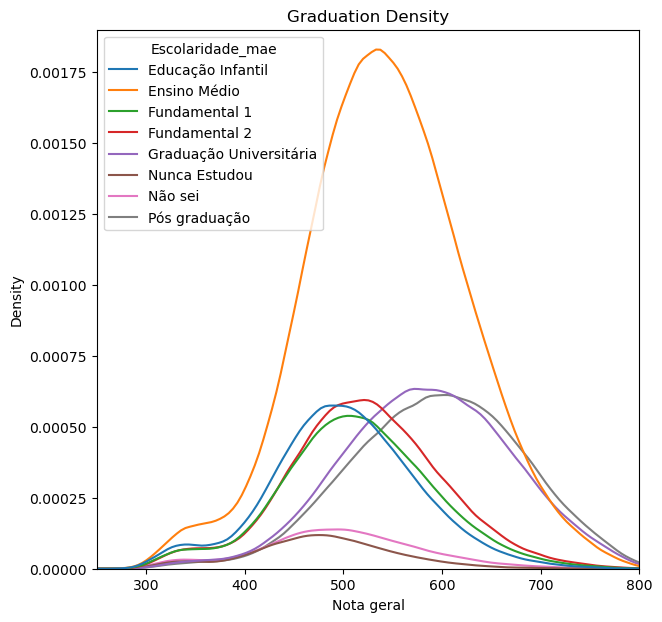

In [22]:
f, ax0 = plt.subplots(figsize=(7,7))
sns.kdeplot(ax=ax0,data=enem_df,x="Nota_geral",hue="Escolaridade_mae")
ax0.set_title('Faixa etária e sua participação')
ax0.set(xlabel='Nota geral')
ax0.title.set_text("Graduation Density")
ax0.axis([250,800,0,0.00190]);

**Visão geral do Gráfico**
- Eixo X: Nota geral
- Eixo Y: Densidade de Probabilidade
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
**Analise do Gráfico**

Ao observar o gráfico de KDE, vemos um comportamento geral em todas as distribuições: há uma maior ocorrência de pontos na extrema esquerda (notas baixas) do que na extrema direita. Também notamos que, quanto maior a escolaridade dos pais, mais a distribuição normal tende a se deslocar para a direita. Ao analisar o lado direito do gráfico, podemos perceber como a escolaridade dos pais impacta as notas do ENEM. Embora a maioria dos casos envolva mães que concluíram o ensino médio (35%), a maior quantidade de notas altas é observada entre os alunos cujos pais têm ensino superior ou pós-graduação.


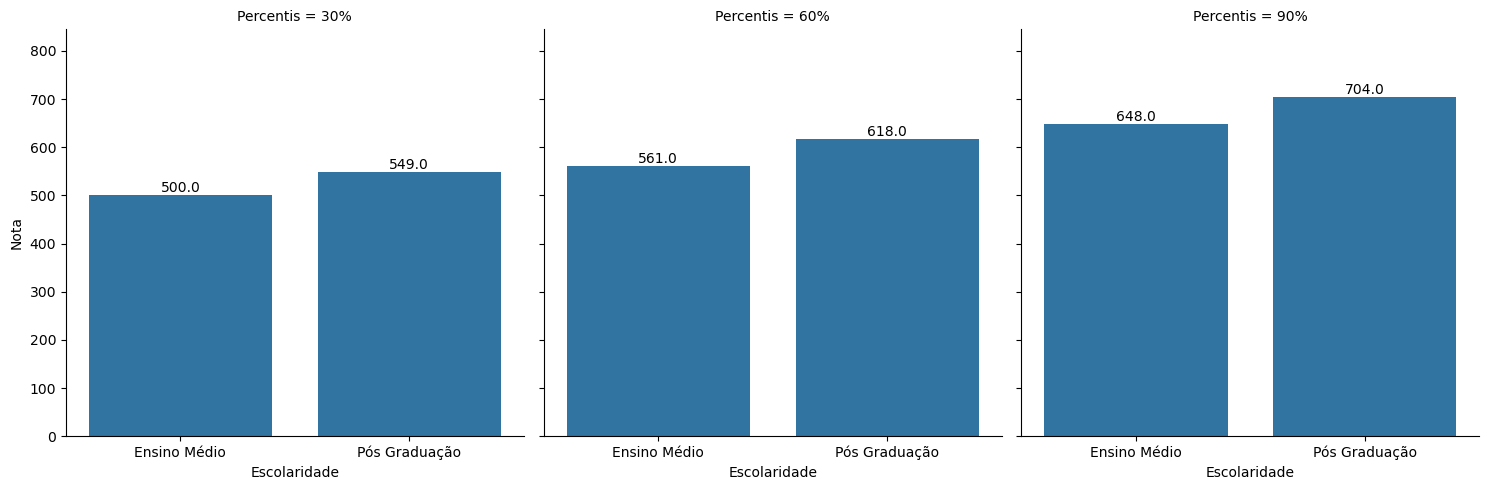

In [24]:

g = sns.catplot(dicesclrd,x="Escolaridade",y="Nota",col="Percentis",kind="bar")
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

## Faixa Etária

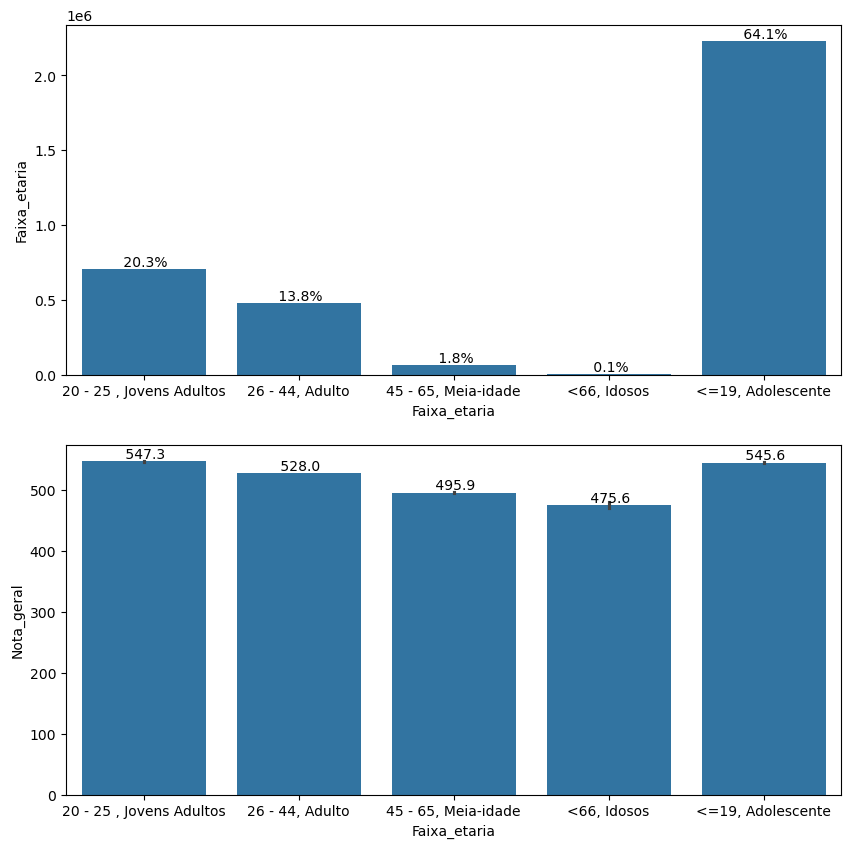

In [26]:
f,ax = plt.subplots(2,1,figsize=(10,10))
sns.barplot(ax=ax[0],x=enem_df['Faixa_etaria'].value_counts(normalize=True).index,y=enem_df.groupby("Faixa_etaria")["Faixa_etaria"].count().sort_values(ascending=False))
sns.barplot(ax=ax[1],data=enem_df,x="Faixa_etaria",y="Nota_geral")
ax[0].bar_label(ax[0].containers[0], fmt = lambda x: f' {(x*100/total):.1f}%');
ax[1].bar_label(ax[1].containers[0], fmt = lambda x: f' {x:.1f}');

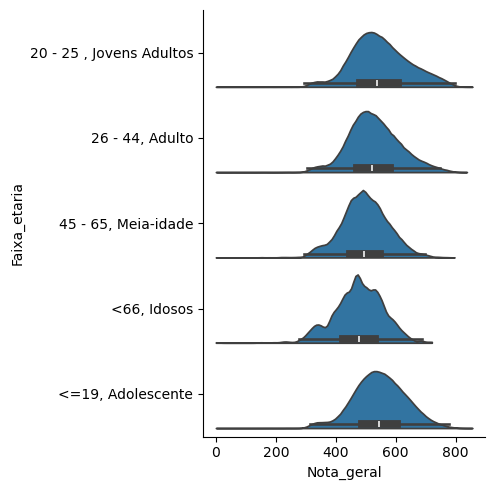

In [27]:
sns.catplot(
    data=enem_df, x="Nota_geral", y="Faixa_etaria",
    kind="violin", bw_adjust=.5, cut=0, split=True);

**Visão geral do Gráfico**
- Eixo X: Nota Geral
- Eixo Y: Faixa Etária, Densidade de Probabilidade
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

**Analise do Gráfico**

Na categoria **Meia-idade** e na categoria **Idosos**, percebemos que não há muitos dados representados no gráfico de barras, o que faz com que o gráfico acima não seja tão bem distribuído quanto os outros. Além disso, essas categorias são as que menos participam das provas e, geralmente, obtêm as notas mais baixas, possivelmente devido ao fato de estarem distantes da escola há muitos anos.

Ao observar o gráfico de barras, vemos que a diferença média entre **adolescentes** e **jovens adultos** não é tão grande. No entanto, quando analisamos o gráfico acima, percebemos que a cauda direita dos jovens adultos possui uma maior concentração, ou seja, há mais pessoas com notas altas, enquanto nos adolescentes essa concentração é menor. Uma possível justificativa para isso são os cursinhos preparatórios. Normalmente, os alunos entre 20 e 25 anos que fazem o ENEM estão frequentando esses cursinhos e se preparando intensivamente para a prova, além de contarem com uma maturidade maior para os estudos.

Nos **adultos**, observamos um padrão semelhante ao dos adolescentes, contudo, as notas dos adultos são piores do que as dos adolescentes.

Siga os percentis abaixo, respectivamente:

- **Jovens Adultos**
- **Adolescente**
- **Adulto**

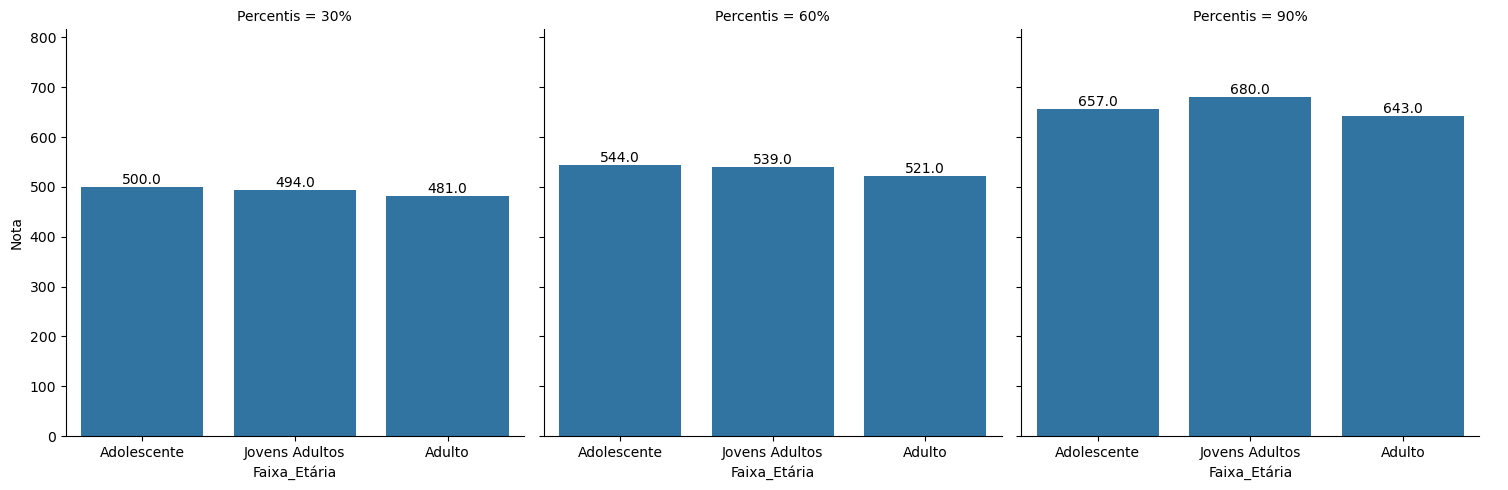

In [29]:

g = sns.catplot(fxetprcnt,x="Faixa_Etária",y="Nota",col="Percentis",kind="bar")
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

## Renda Familiar

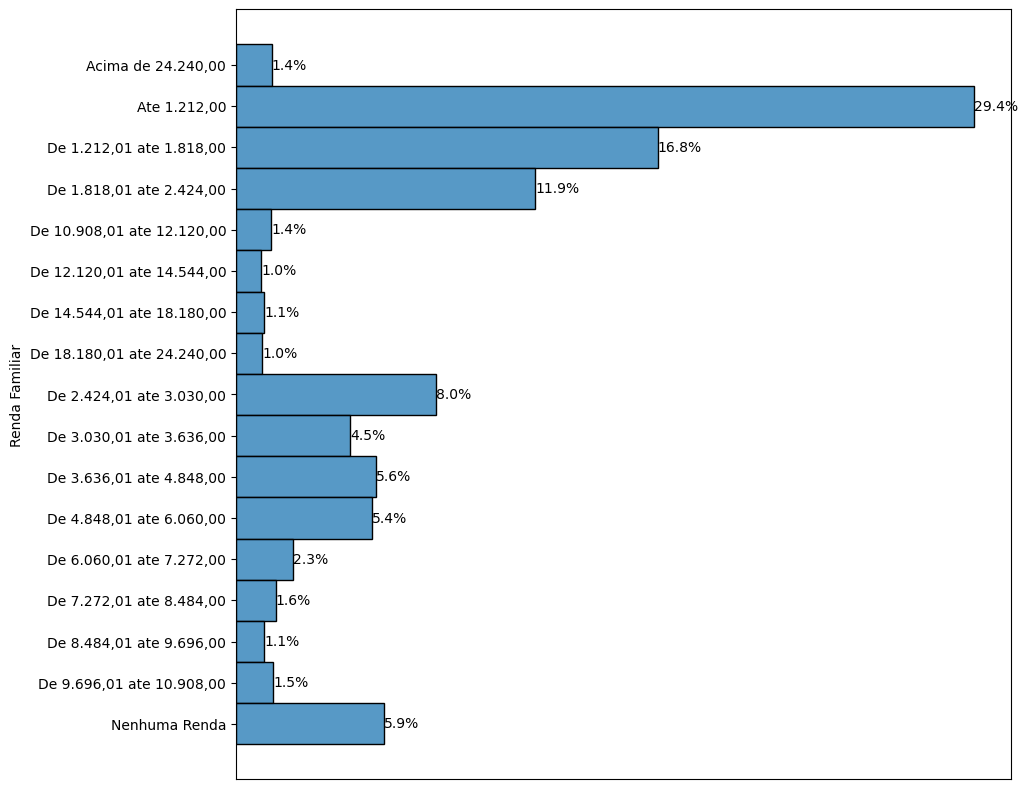

In [31]:
f ,ax = plt.subplots(figsize=(10,10))
sns.histplot(data=enem_df,y="Renda_familiar")
ax.bar_label(ax.containers[0],fmt=lambda x: f'{(x/total)*100:0.1f}%');
ax.set(ylabel="Renda Familiar")
ax.set(xlabel=" ")
ax.set_xticks([]);

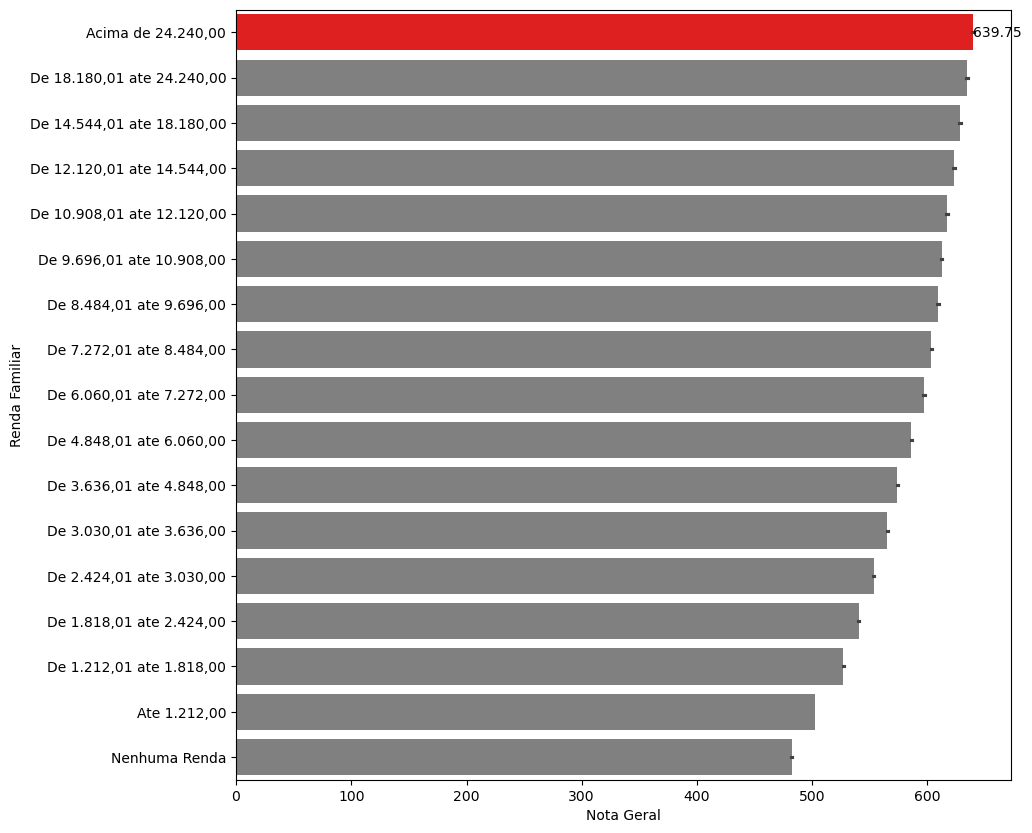

In [32]:
ord2 = enem_df.groupby("Renda_familiar")["Nota_geral"].mean().sort_values(ascending=False).index
cols5 = ["gray" if (x < max(enem_df.groupby("Renda_familiar")["Nota_geral"].mean().sort_values(ascending=False))) else 'red' for x in enem_df.groupby("Renda_familiar")["Nota_geral"].mean().sort_values(ascending=False) ]
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=enem_df,x='Nota_geral',y="Renda_familiar",order=ord2,palette=cols5)
ax.set(xlabel="Nota Geral",ylabel="Renda Familiar")
ax.bar_label(ax.containers[0],fmt =  lambda x: f'{x:.2f}');

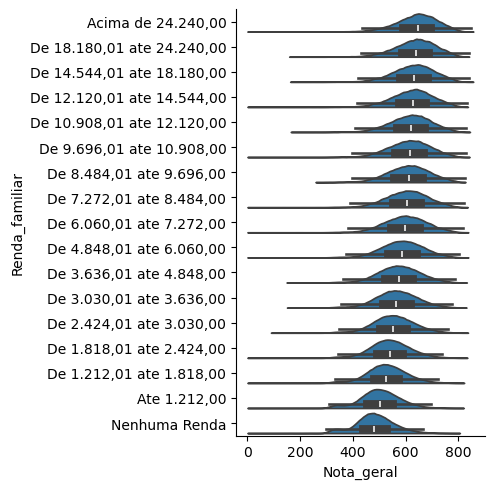

In [33]:
sns.catplot(
    data=enem_df, x="Nota_geral", y="Renda_familiar",
    kind="violin",order=ord2, bw_adjust=.5, cut=0, split=True);

**Visão geral do Gráfico**
- Eixo X: Nota Geral
- Eixo Y: Faixa Salarial,Densidade de Probabilidade
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
**Analise do Gráfico**

Como mencionado anteriormente, o fator que mais impacta a nota média dos alunos é a renda familiar, seja pelo acesso a escolas melhores, pais com escolaridade mais alta, entre outros fatores. No gráfico acima, podemos observar como a distribuição das notas se desloca para a direita à medida que a renda familiar aumenta.

A seguir, observe os percentis que demonstram a diferença entre os alunos com maior renda e os alunos sem nenhuma renda:

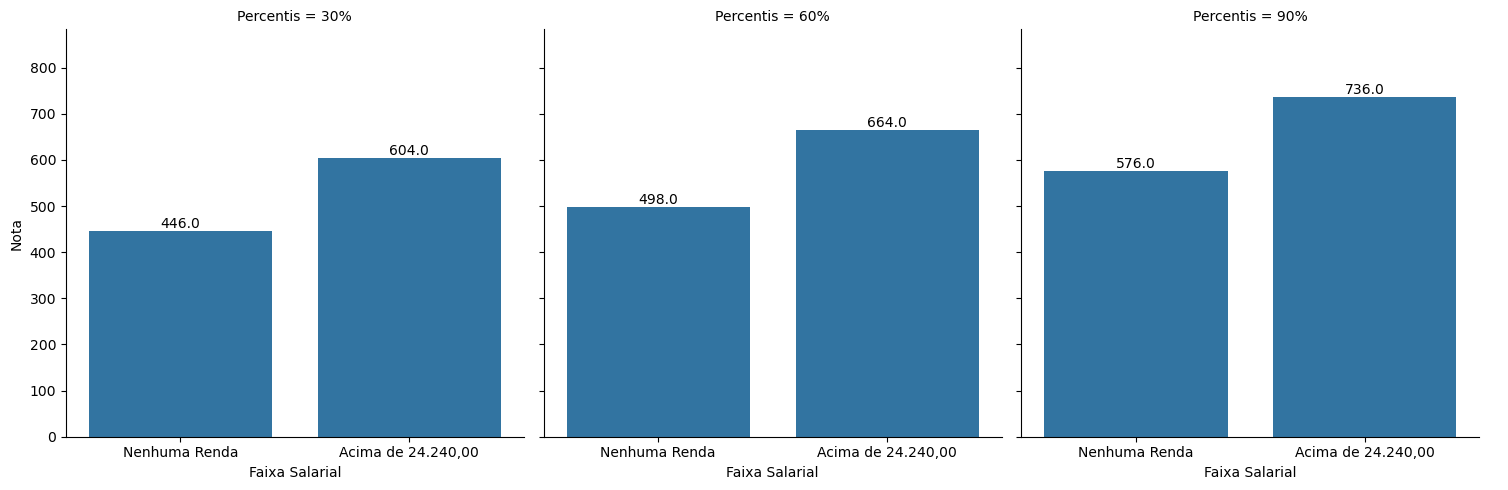

In [35]:

g = sns.catplot(fxslrprcnt,x="Faixa Salarial",y="Nota",col="Percentis",kind="bar")
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

## Metodo de Ensino

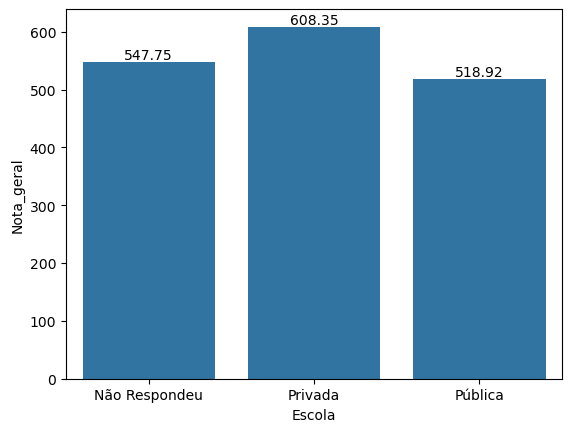

In [37]:
f, ax = plt.subplots()
sns.barplot(enem_df,x="Escola",y="Nota_geral")
ax.bar_label(ax.containers[0],fmt = lambda x: f'{x:.2f}');


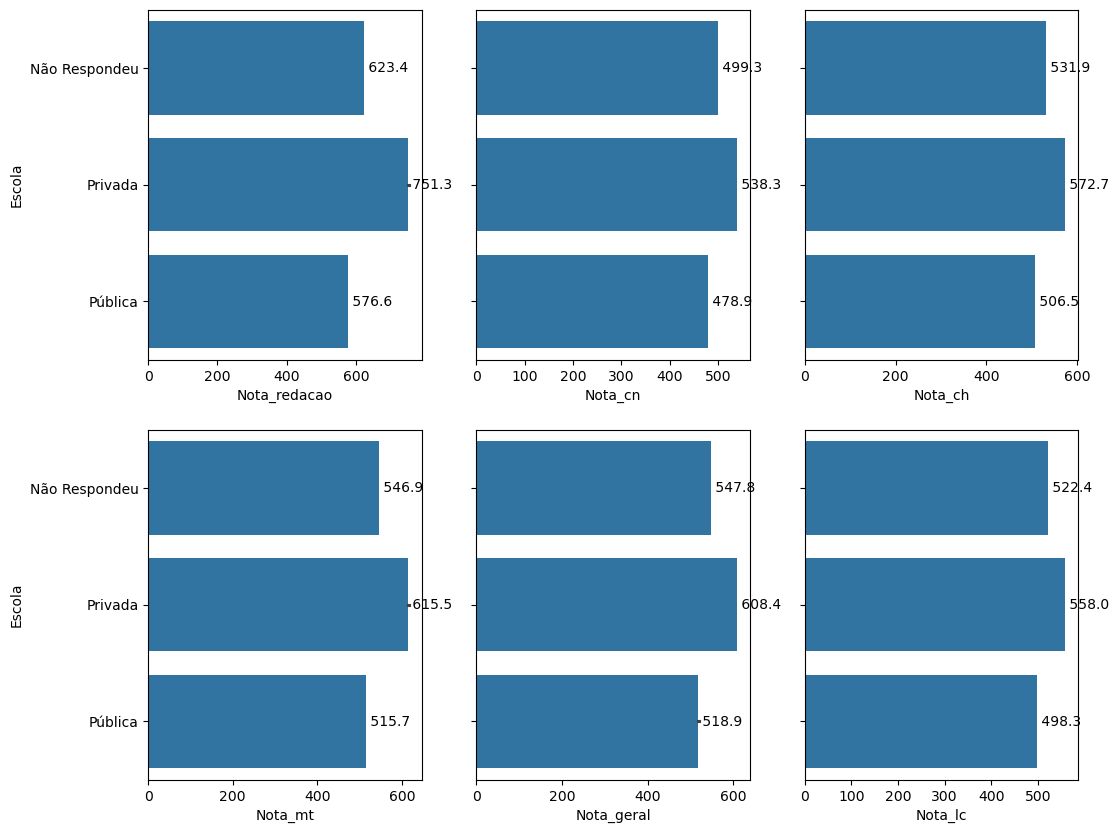

In [83]:
nts = ["Nota_redacao","Nota_cn","Nota_ch","Nota_mt","Nota_geral","Nota_lc"]
f, ax = plt.subplots(2,3,figsize=(12,10),sharey=True)
ticker = 0
for i in range(0,2):
    for j in range(0,3):
        sns.barplot(ax=ax[i,j],data=enem_df,y="Escola",x=nts[ticker])
        ticker += 1
        ax[i,j].bar_label(ax[i,j].containers[0], fmt = lambda x: f' {x:.1f}')


**Visão geral do Gráfico**
- Eixo X: Notas
- Eixo Y: Método de Ensino
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**

Não fizemos a análise da classe "sem resposta" porque não é relevante.
- **Nota Ciencias da Natureza e Lingua Portuguêsa** - Essas matérias têm as notas médias mais baixas entre todas, tanto em escolas particulares quanto públicas. Além disso, a diferença entre escolas públicas e particulares nessas duas matérias não é tão discrepante quanto em Matemática e Redação, com uma diferença de **100** e **170** pontos, respectivamente
- **Nota Redação** - Esta matéria apresenta a maior disparidade entre alunos de escolas públicas e privadas, especialmente na parte que mais eleva as notas dos alunos. Em muitas escolas públicas do Brasil, há apenas uma aula de redação por semana, enquanto nas escolas privadas há mais de uma. Além disso, a prova de redação no Brasil segue alguns modelos "prontos", e provavelmente nas escolas particulares há tempo suficiente para abordar esses modelos com mais profundidade.



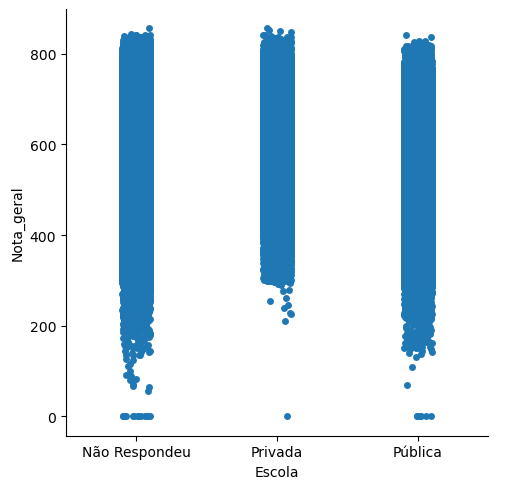

In [48]:
sns.catplot(data=enem_df, x="Escola", y="Nota_geral");


**Visão geral do Gráfico**
- Eixo X: Método de Ensino
- Eixo Y: Nota Geral
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**

Comparando as escolas privadas com as escolas públicas, observamos que nas escolas particulares quase não há alunos com uma nota média de 200 (exceto aqueles que não fizeram a prova e tiraram 0), enquanto nas escolas públicas há vários alunos nessa faixa. Isso indica que os piores alunos das escolas públicas têm um desempenho diferente dos piores alunos das escolas privadas. Também é possível notar que os alunos de escolas públicas têm a possibilidade de tirar notas equiparadas aos alunos de escolas privadas, basta observar os melhores desempenhos. No entanto, esses casos são menos frequentes nas escolas públicas, como podemos perceber pela "densidade" dos pontos no gráfico.

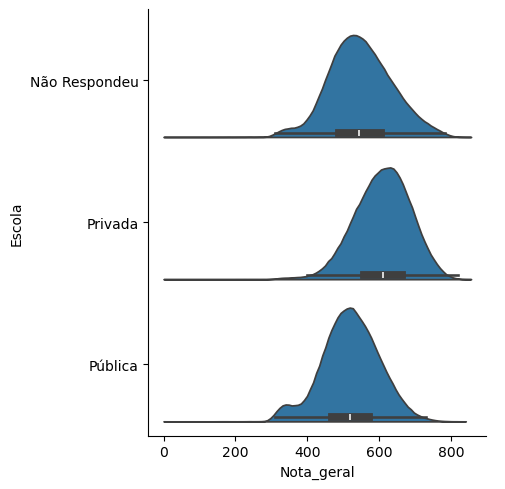

In [50]:
sns.catplot(
    data=enem_df, x="Nota_geral", y="Escola",
    kind="violin", bw_adjust=.5, cut=0, split=True);

**Visão geral do Gráfico**
- Eixo X: Método de Ensino
- Eixo Y: Nota Geral,Densidade de Probabilidade
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**

Este gráfico reforça nossa ideia de que os alunos de escolas públicas apresentam notas mais baixas com maior frequência do que os alunos de escolas particulares, como é evidente pela cauda esquerda da distribuição das notas nas escolas públicas. Além disso, percebemos que, em geral, as notas dos alunos de escolas particulares são melhores do que as dos alunos de escolas públicas. Isso é evidenciado não apenas pelo gráfico de barras analisado anteriormente, mas também pelo deslocamento para a direita da curva da escola particular, que demonstra que, no geral, os alunos de escolas particulares obtêm notas mais altas.

## Raça

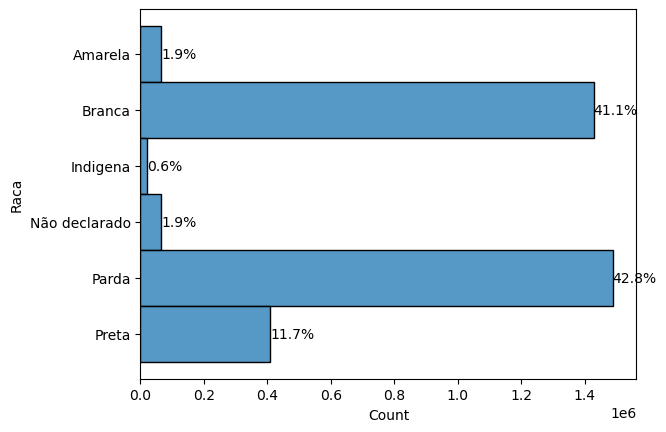

In [53]:

f,ax = plt.subplots()
sns.histplot(enem_df,y="Cor_raca")
ax.bar_label(ax.containers[0],fmt=lambda x: f'{(x/total)*100:0.1f}%');
ax.set(ylabel='Raca');

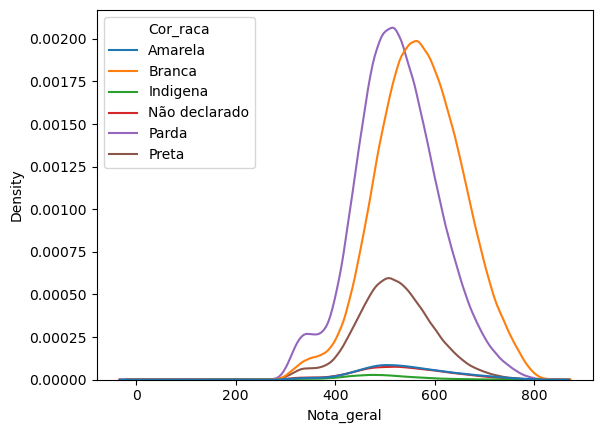

In [54]:
sns.kdeplot(data=enem_df,x="Nota_geral",hue="Cor_raca",common_norm=True);

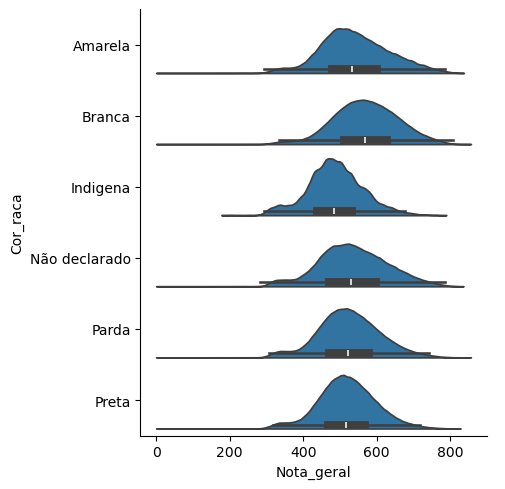

In [55]:
sns.catplot(
    data=enem_df, x="Nota_geral", y="Cor_raca",
    kind="violin", bw_adjust=.5, cut=0, split=True);

**Visão geral do Gráfico**
- Eixo X: Nota Geral
- Eixo Y: Cor Raça, Densidade de Probabilidade
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**

No gráfico, observamos que há apenas uma curva com uma cauda mais espessa, a dos indígenas, o que pode ser atribuído à menor quantidade de alunos nessa categoria que realizam a prova. Em relação às demais categorias raciais, a principal diferença é que os brancos estão mais deslocados para a direita, indicando notas médias melhores, enquanto os pretos estão mais deslocados para a esquerda, apresentando uma das notas mais baixas entre as três categorias. A diferença entre pardos e pretos não é tão significativa nos percentis mais baixos, mostrando um leve aumento nas notas para os pardos à medida que se sobe nos percentis.

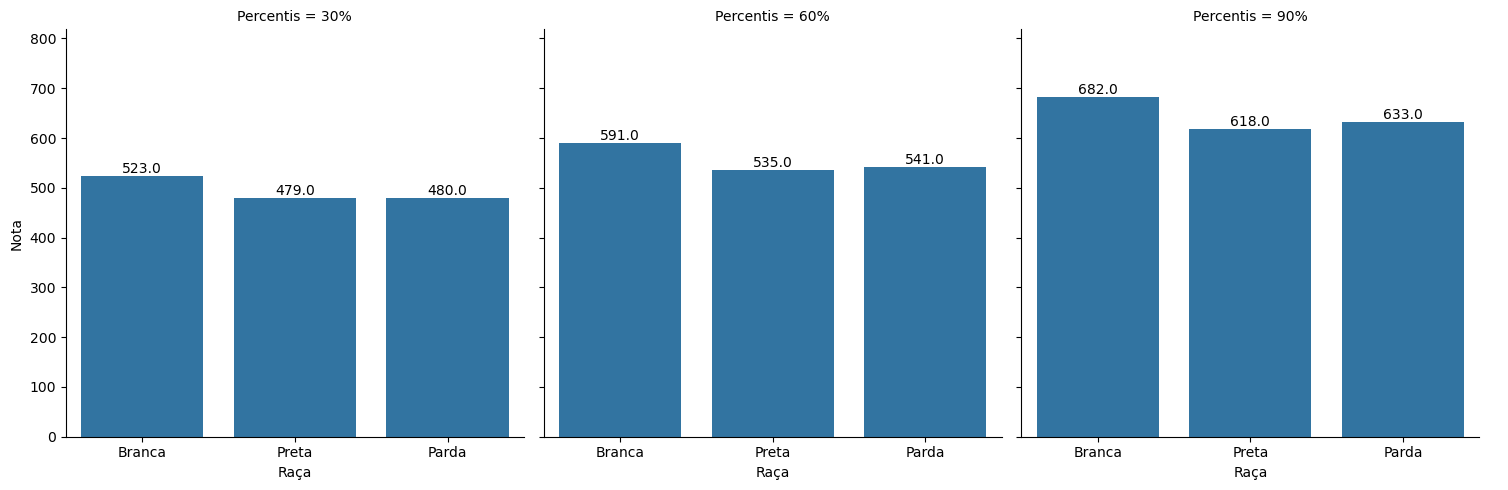

In [57]:
g = sns.catplot(rcprcnt,x="Raça",y="Nota",col="Percentis",kind="bar")
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

## Estado Cívil e Genêro

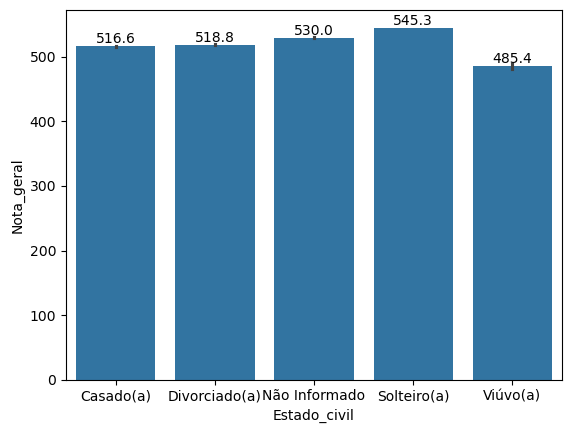

In [59]:
f, ax = plt.subplots()
sns.barplot(enem_df,x="Estado_civil",y="Nota_geral")
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x:0.1f}');

**Visão geral do Gráfico**
- Eixo X: Estado Cívil
- Eixo Y: Nota Geral
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**

Podemos fazer algumas associações com este gráfico. Sabemos que pessoas solteiras têm mais tempo para estudar, especialmente porque estão, em sua maioria, no ensino médio ou acabaram de concluir. Alem que, observamos anteriormente que a idade inicial é um fator importante para obter uma nota melhor, nós sabemos que pessoas casadas tem uma média de idade mais alta. Além disso, notamos que os viúvos têm algumas das piores notas. Esse caso pode estar associado a uma faixa etária mais elevada e, além disso, a perda de um cônjuge pode levar a uma diminuição na renda familiar, um fator também relevante para o aumento das notas.



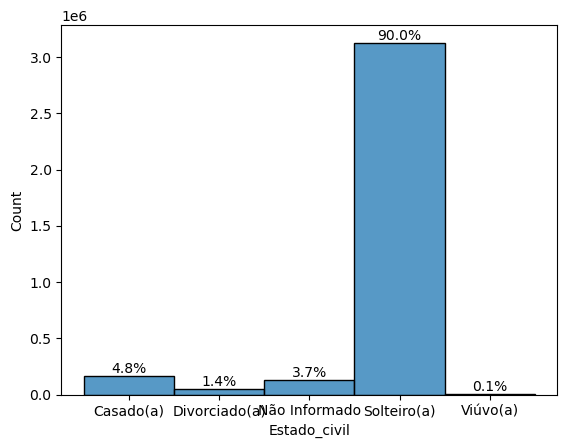

In [61]:
f ,ax = plt.subplots()
sns.histplot(enem_df,x="Estado_civil")
ax.bar_label(ax.containers[0],fmt=lambda x: f'{(x/total)*100:0.1f}%');

**Visão geral do Gráfico**
- Eixo X: Estado Cívil
- Eixo Y: Nota Geral
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**

Como esperado, os alunos por estarem saindo do ensino médio e serem em sua maioria adolescentes/adultos-jovens eles são solteiros.

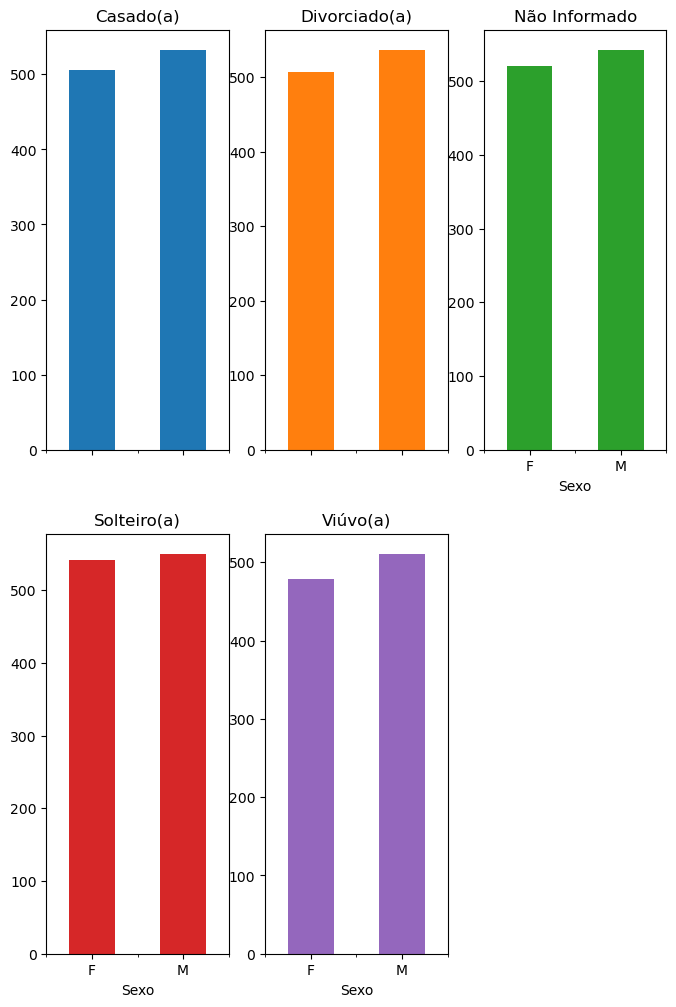

In [63]:

aa = enem_df.groupby(["Estado_civil","Sexo"])["Nota_geral"].mean()
ax = aa.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(8, 12), layout=(2, 3),legend=False)


**Visão geral do Gráfico**
- Eixo X: Sexo
- Eixo Y: Nota Geral
- Cores: Estado Cívil
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**
Como podemos observar, entre os solteiros que prestam o ENEM, não há uma diferença significativa por gênero. No entanto, a diferença se acentua em casos de divórcio e casamento, sendo mais pronunciada na categoria dos viúvos.

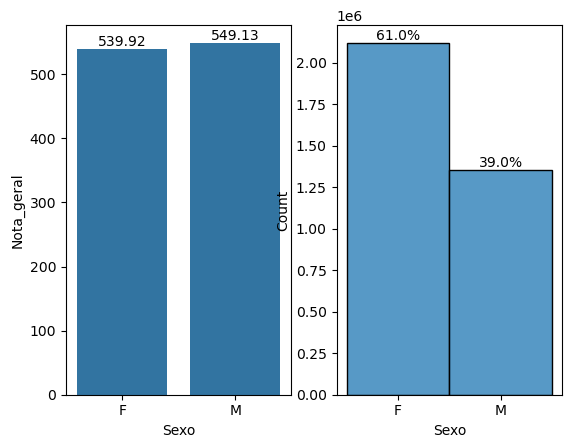

In [65]:
f, ax = plt.subplots(1,2)
sns.barplot(ax=ax[0],data=enem_df,x="Sexo",y="Nota_geral")
ax[0].bar_label(ax[0].containers[0],fmt= lambda x: f'{x:.2f}')
sns.histplot(ax=ax[1],data=enem_df,x="Sexo")
ax[1].bar_label(ax[1].containers[0],fmt=lambda x: f'{(x/total)*100:0.1f}%');

**Visão geral do Gráfico**
- Eixo X: Genêro
- Eixo Y: Nota Geral, Contagem
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
No geral, a média das notas das mulheres não se distancia muito da dos homens. Podemos atribuir essa pequena diferença ao relacionar o gênero com o estado civil, já que observamos que mulheres casadas ou divorciadas têm notas significativamente menores do que os homens. Além disso, há uma diferença significativa entre a quantidade de homens e mulheres que realizam o ENEM, sendo o número de mulheres bem maior, cerca de 21% mais alto.



## Notas por estado

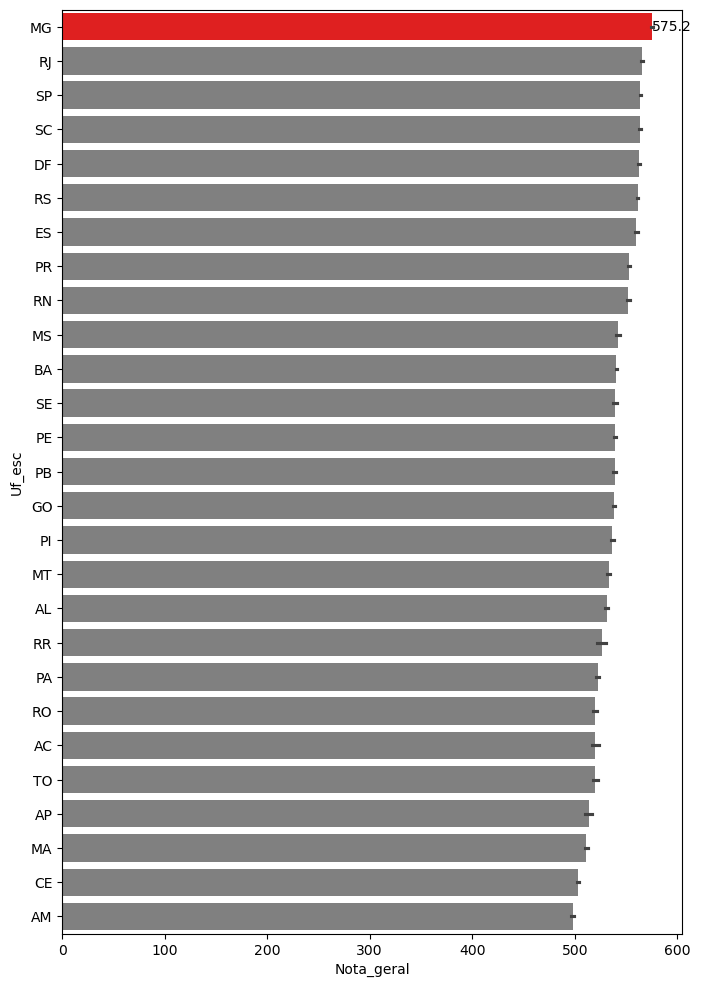

In [68]:
ord3 = enem_df.groupby("Uf_esc")["Nota_geral"].mean().sort_values(ascending=False).index
cols = ['grey' if (y < max(enem_df.groupby("Uf_esc")["Nota_geral"].mean())) else 'red' for y in enem_df.groupby("Uf_esc")["Nota_geral"].mean().sort_values(ascending=False)]
f,ax = plt.subplots(figsize=(8,12))
sns.barplot(enem_df,y="Uf_esc",x="Nota_geral",order=ord3,palette=cols)
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x:0.1f}');

**Visão geral do Gráfico**
- Eixo X: Unidades Federativas
- Eixo Y: Nota Geral
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**

Entre todos os estados, Minas Gerais teve a maior média de notas. Vários fatores podem influenciar as notas dos estados, como a escolaridade dos pais, a renda média, entre outros. No entanto, esses fatores não parecem ser os mais determinantes para o desempenho do estado, pois São Paulo, um estado rico com o maior acesso à educação no Brasil, não apresenta a mesma posição de destaque. Isso nos leva a crer que as políticas públicas para a educação em Minas Gerais são mais eficazes do que em outros estados.


In [70]:
mappa2 = gpd.read_file('C:\\Users\\Lucas\\Data Science P1\\Data Science//bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

In [71]:
mappa = pd.DataFrame(enem_df.groupby("Uf_esc")["Nota_geral"].mean())

In [72]:
mappa2.rename({"sigla":"Uf_esc"},axis=1,inplace=True)

In [74]:
mappa2 = mappa2.merge(mappa,on="Uf_esc",how="right")
mappa2.loc[:,["Uf_esc","Nota_geral","geometry"]].head(2)

,Uf_esc,Nota_geral,geometry
0,AC,520.025818,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."
1,AL,530.961731,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."


<Axes: >

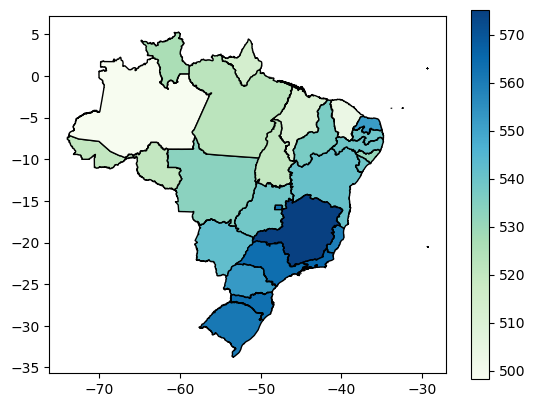

In [80]:
mappa2.plot(column="Nota_geral",cmap="GnBu",legend=True,edgecolor='Black')

## Tecnologia


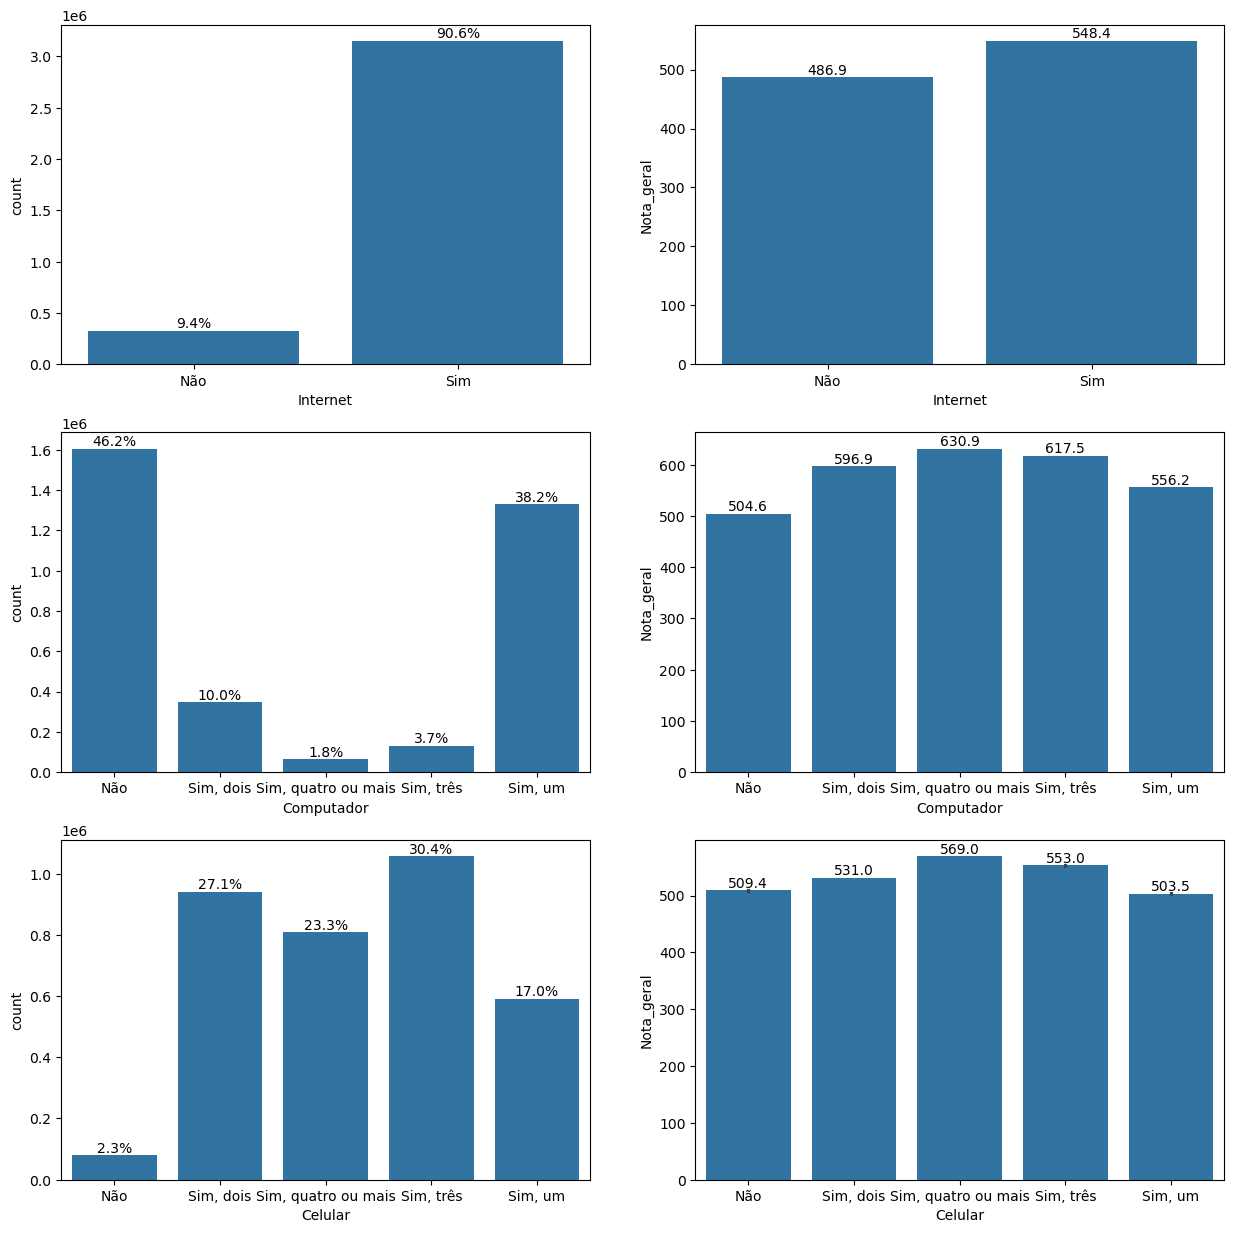

In [82]:
f, ((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2,figsize=(15,15));
sns.barplot(ax=ax1,data=enem_df,x="Internet",y="Nota_geral")
ax1.bar_label(ax1.containers[0],fmt=lambda x: f'{x:0.1f}');
sns.countplot(ax=ax0,data=enem_df,x="Internet")
ax0.bar_label(ax0.containers[0],fmt=lambda x: f'{(x/total)*100:0.1f}%');
sns.barplot(ax=ax3,data=enem_df,x="Computador",y="Nota_geral")
sns.barplot(ax=ax5,data=enem_df,x="Celular",y="Nota_geral")
sns.countplot(ax=ax2,data=enem_df,x="Computador")
ax2.bar_label(ax2.containers[0],fmt=lambda x: f'{(x/total)*100:0.1f}%');
sns.countplot(ax=ax4,data=enem_df,x="Celular")
ax4.bar_label(ax4.containers[0],fmt=lambda x: f'{(x/total)*100:0.1f}%');
ax3.bar_label(ax3.containers[0],fmt=lambda x: f'{x:0.1f}');
ax5.bar_label(ax5.containers[0],fmt=lambda x: f'{x:0.1f}');

**Visão geral do Gráfico**
- Eixo X: Acesso a Tecnologia
- Eixo Y: Contagem / Nota Geral
-  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 **Analise do Gráfico**
Um dos melhores recursos atuais para estudar é a internet. Observamos que ela é um fator importante para a melhoria das notas dos alunos. Embora a falta de acesso à internet possa estar ligada à renda familiar e à pobreza, não podemos atribuir a queda de nota apenas a esses fatores. A internet oferece informações valiosas e muitas delas são gratuitas, em vez de gastar horas pesquisando em livros, o aluno pode obter as informações instantaneamente online.

Também notamos uma diferença significativa entre os alunos que têm um computador e aqueles que não têm. No entanto, em relação aos celulares, o fato de ter ou não um celular não parece impactar significativamente as notas. Um detalhe interessante é que há mais alunos sem acesso à internet do que alunos sem celular.

# Conclusão
Ao final da análise exploratória, obtivemos diversos insights valiosos por meio da visualização dos dados. Esses insights destacam aspectos importantes sobre o desempenho dos alunos no ENEM, assim como fatores socioeconômicos e demográficos que influenciam seus resultados. Entre os principais pontos observados, destacam-se:

- **Desempenho em Ciências da Natureza**: A área de Ciências da Natureza é notoriamente a mais desafiadora para os alunos, registrando as menores médias de notas entre todas as disciplinas. Curiosamente, a diferença entre o desempenho de alunos de escolas públicas e privadas é mínima, indicando que, de maneira geral, essa é uma área em que a maioria dos estudantes apresenta dificuldades, independentemente do tipo de instituição de ensino.

- **Impacto da Educação e Renda dos Pais**: Observamos uma correlação significativa entre o nível de educação dos pais e o desempenho dos alunos. Esse efeito é intensificado pelo fator de renda, pois pais com maior escolaridade tendem a ter uma melhor situação financeira, o que possibilita proporcionar uma educação de maior qualidade aos filhos. Isso reflete diretamente nas notas dos alunos, que tendem a ser mais altas conforme a renda familiar aumenta.

- **Influência da Renda Familiar**: A renda familiar é um forte indicador do desempenho no ENEM. Conforme a renda aumenta, as notas médias também tendem a subir. No entanto, essa relação parece atingir um ponto de saturação em rendas muito elevadas (na faixa de 100 a 200 mil reais), onde o impacto incremental na nota já não é tão expressivo quanto na comparação entre famílias com renda significativamente menor, por exemplo, de 20 mil reais.

- **Desempenho por Estado**: Entre os estados brasileiros, Minas Gerais destaca-se com as melhores notas médias, enquanto o Amazonas está entre os que apresentam os piores resultados. Essa diferença pode estar associada, em parte, à maior presença de alunos indígenas no Amazonas, uma vez que a análise por etnia mostrou que essa população, em geral, tende a registrar notas mais baixas.

- **Desempenho por Gênero e Estado Civil**: Observou-se que, em média, homens obtêm uma pontuação ligeiramente superior às mulheres, com uma diferença de aproximadamente 10 pontos. Contudo, essa diferença é mais pronunciada entre homens e mulheres casados, onde os homens se destacam mais, enquanto entre solteiros, a diferença de desempenho é menos expressiva.

- **Correlação entre Faixa Etária e Notas**: A análise mostrou que há uma correlação entre a faixa etária dos alunos e suas notas, especialmente entre os jovens adultos. Alunos mais velhos, que estão nos percentis mais altos, tendem a apresentar melhores resultados do que os adolescentes. Isso pode ser atribuído ao fato de que esses alunos mais velhos geralmente já estão em um estágio mais avançado de preparação, possivelmente frequentando cursinhos preparatórios ou repetindo o exame na busca de melhores resultados para ingressar em uma faculdade de prestígio.

- **Estratégia de Foco em Matemática e Redação**: Foi notável que as provas de Matemática e Redação são aquelas em que os alunos, em média, conseguem alcançar notas mais altas. Dessa forma, uma estratégia eficaz para melhorar o desempenho geral no ENEM pode ser focar nessas duas áreas, o que pode ser determinante para obter uma melhor colocação no exame.